# Principal Components Analysis (PCA)

---

PCA is a very popular technique for performing "dimensionality reduction" on your data. 

Dimensionality reduction is the process of combining or collapsing your existing features (columns in X) into new features that not only retain the original information but also ideally reduce noise.

## What is PCA?

---

Technically speaking, PCA finds the linear combinations of your current predictor variables that will create new "principal components" that explain, in order, the maximum possible amount of variance in your predictors.

That's likely confusing, and will hopefully become clearer soon. 

The more intuitive way of thinking about PCA is that **it transforms the coordinate system so that the axes become the  most concise, informative descriptors of our data as a whole.**

The new axes are the principal components.


### The Process of PCA 

---

Say we have a matrix $X$ of predictor variables. PCA will give us the ability to transform our $X$ matrix into a new matrix $Z$. 

First we will derive a **weighting matrix** $W$ from the correlational/covariance structure of $X$ that allows us to perform the transformation.

Each successive dimension (column) in $Z$ will be rank-ordered according to variance in it's values!

**There are 3 assumptions that PCA makes:**
1. Linearity: Our data does not hold nonlinear relationships.
2. Large variances define importance: our dimensions are constructed to maximize remaining variance.
3. Principal components are orthogonal: each component (columns of $Z$) is completely un-correlated with the others.

### Eigenvalues and Eigenvectors

---

(The jargon in PCA is really the scariest part. Once you get a feel for what these concepts are it's not that bad!)

[The next few graphics are shamelessly stolen from this blog...](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/)

In [1]:
Image(filename='../assets/images/eigenvalue.png') 

NameError: name 'Image' is not defined

In [2]:
Image(filename='../assets/images/eigenvectors_orthogonal.png') 

NameError: name 'Image' is not defined

In [3]:
Image(filename='../assets/images/transformed_xy.png') 

NameError: name 'Image' is not defined

**EIGENVECTORS**

An eigenvector specifies a direction through the original coordinate space. The eigenvector with the highest correspoding eigenvalue is the first principal component.

---

**EIGENVALUES**

Eigenvalues indicate the amount of variance in the direction of it's corresponding eigenvector.

---

**Every eigenvector has a corresponding eigenvalue!**

In [ ]:
Image(filename='../assets/images/pca_coordinate_transformation.png') 

### "Principal Components"

---

What is a principal component? **Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes constructs new variables that are optimized to explain as much variance as possible and to be independent (uncorrelated).

Creating these variables is a well-defined mathematical process, but in essence **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

**PRINCIPAL COMPONENT TRANSFORMATION OF DATA: PC1 VS PC2**

[Definitely try this out at setosa.io – it's an extremely nice way to learn it!](http://setosa.io/ev/principal-component-analysis/)

---

In [ ]:
Image(filename='../assets/images/setosa_pc1.png') 

### Why would we want to do PCA?

---

- We can reduce the number of dimensions (remove bottom number of components) and lose the least possible amount of variance information in our data.
- Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
- The directions of largest variance should have the highest Signal to Noise ratio.
- Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.

---

[Good paper on PCA](http://arxiv.org/pdf/1404.1100.pdf)

[Nice site on performing PCA](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda)

## Manual PCA Codealong

---

**MANUAL PCA STEPS:**

1. Standardize data: centering is required, but full normalization is nice for visuals later.
2. Calculate eigenvectors and eigenvalues from correlation or covariance matrix.
3. Sort eigenvalues and choose eigenvectors that correspond to the largest eigenvalues. The number you choose is up to you, but we will take 2 for the sake of visualization here.
4. Construct the projection weighting matrix $W$ from the eigenvectors.
5. Transform the original dataset $X$ with $W$ to obtain the new 2-dimensional transformed matrix $Z$.

---

**DATA**

We are going to be using a simple 75-row, 4-column dataset with demographic information. It contains:

    age (limited to 20-65)
    income
    health (a rating on a scale of 1-100, where 100 is the best health)
    stress (a rating on a scale of 1-100, where 100 is the most stressed)
    
All of the variables are continuous.

---

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('../assets/datasets/simple_demographics.csv')

In [5]:
demo.head(1)

,age,health,income,stress
0,21,74.0,42746.0,53.0


### 1. Basic EDA

Make a seaborn regplot for each of:

1. age vs. income
2. age vs. health
3. age vs. stress

Also make a pairplot of the entire dataset.

---

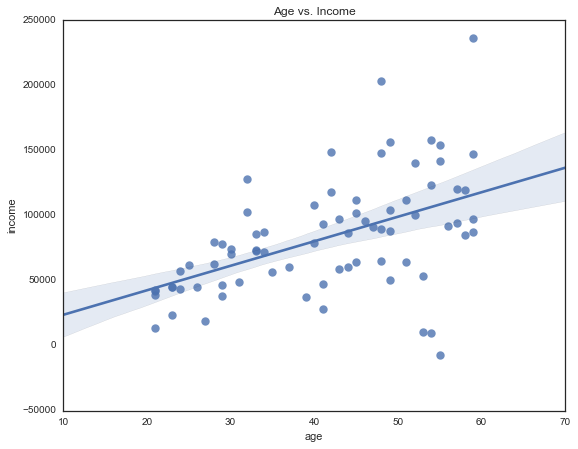

In [10]:
# age vs income
fig = plt.figure(figsize=(9,7))
ax=fig.gca()
sns.regplot(x='age', y='income',data=demo, ax=ax, scatter_kws={'s':70})
plt.title('Age vs. Income')
plt.show()

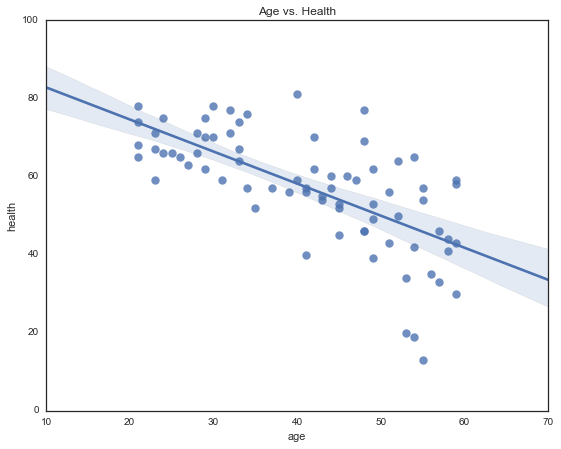

In [11]:
# age vs health

fig = plt.figure(figsize=(9,7))
ax=fig.gca()
sns.regplot(x='age', y='health',data=demo, ax=ax, scatter_kws={'s':70})
plt.title('Age vs. Health')
plt.show()

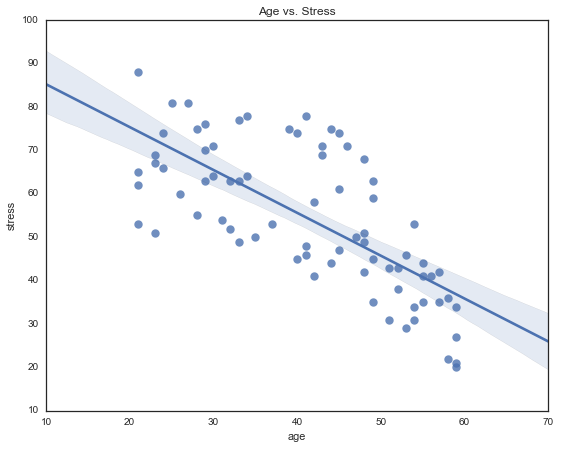

In [12]:
# age vs stress

fig = plt.figure(figsize=(9,7))
ax=fig.gca()
sns.regplot(x='age', y='stress',data=demo, ax=ax, scatter_kws={'s':70})
plt.title('Age vs. Stress')
plt.show()

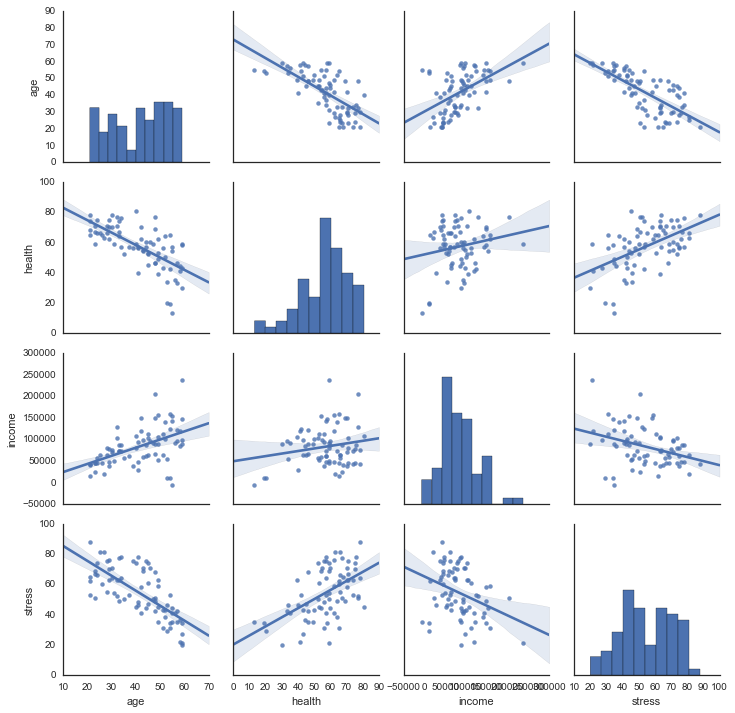

In [13]:
# pairplot
sns.pairplot(kind='reg',data=demo)

### 2. Subset and normalize

Subset data to just:

    income
    health
    stress

We will be comparing the principal components to age specifically so we are leaving them out.

---

In [27]:
from sklearn.preprocessing import StandardScaler

# subset to income, health, stress
sub = ['income', 'health','stress']

demo[sub]

# normalize
stdsc = StandardScaler()

subset = stdsc.fit_transform(demo[sub])

subset = pd.DataFrame(subset, columns=sub)

In [28]:
subset.head()

,income,health,stress
0,-0.900920,1.170996,-0.084764
1,-0.220986,0.476180,-0.329274
2,-0.189621,1.448922,0.587640
3,0.452385,0.962551,0.526513
4,0.856779,-0.774488,-1.185061


### 3. Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

---

In [40]:
corr = subset.corr()
corr

,income,health,stress
income,1.000000,0.192037,-0.347925
health,0.192037,1.000000,0.527663
stress,-0.347925,0.527663,1.000000


### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
    
---

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(corr)

print eigenvalues, '\n \n', eigenvectors

[ 0.26996948  1.17357375  1.55645677] 
 
[[-0.46791364  0.84716255 -0.25173885]
 [ 0.59525118  0.5126449   0.6187659 ]
 [-0.65324793 -0.13968116  0.74414804]]


### 4. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

$$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

---

In [41]:
eigen_total = np.sum(eigenvalues)

for x in range(len(eigenvalues)):
    print "Explained Variance For Eigen Vector", x, ':', eigenvalues[x]/eigen_total *100

Explained Variance For Eigen Vector 0 : 8.9989826545
Explained Variance For Eigen Vector 1 : 39.1191250694
Explained Variance For Eigen Vector 2 : 51.8818922761


In [ ]:
# component number vs cumulative variance explained


### 5. Construct the Projection Matrix $W$

This is simply a matrix of our top 2 eigenvectors.

The eigenvectors are concatenated as columns.

1. Start by ordering the eigenvectors by their corresponding eigenvalues biggest to smallest.
- Concatenate the eigenvectors together. `np.hstack()` is useful for this.

---

In [45]:
# pair eigenvalues and eigenvectors, then sort biggest to smallest by eigenvalue
value_vector_pairs = [[eigenvalues[i], eigenvectors[:,i]] 
                      for i in 
                      range(len(eigenvalues))]

value_vector_pairs.sort(reverse=True)

In [50]:
# create the projection matrix W
weight_2d_projection = np.hstack((
                                value_vector_pairs[0][1].reshape(eigenvectors.shape[1],1),
                                value_vector_pairs[1][1].reshape(eigenvectors.shape[1],1)
    ))

print "Weight data 2d PCA projection matrix: \n", weight_2d_projection

Weight data 2d PCA projection matrix: 
[[-0.25173885  0.84716255]
 [ 0.6187659   0.5126449 ]
 [ 0.74414804 -0.13968116]]


### 6. Construct the Transformed 2D Matrix $Z$

To do this, we take the dot product of our 3D demographic matrix $X$ with the projection matrix $W$

---

In [ ]:
# Create the 2D transformed dataset Z


### 7. Plot Principal Component 1 vs 2

PC1 is the first column in $Z$, and PC2 is the second.

Notice how they are un-correlated.

---

In [ ]:
# plot data on PC1 vs PC2 


### 8. Plot age vs principal component 1 with regplot

Look how tight the relationship is. PC1 took the shared variance out of income, health, and stress, which are intuitively directly related to increasing age. 

This principal component, or more specifically the column weighting matrix $W$, is essentially **capturing the latent age variance embedded in these variables.**

---

In [ ]:
# plot age vs PC1 using regplot


### 9. Concatenate PC1 and PC2 to the full demographic (4D) dataset, then melt it with PC1 and PC2 and index variables

1. Re-normalize so that all 4 variables are on the same scale.
2. Remember the pandas melt code:

```python
melted_df = pd.melt(df, id_vars=['PC1','PC2'])
```

---

In [ ]:
# normalize the full demo dataset (age, income, health, stress)

# add PC1 and PC2 as new columns

# melt the demo dataframe with PC1 and PC2 and id_vars


### 10. Use lmplot to check out PC1 vs all 4 variables

Make the `col` keyword argument "variable" and the `hue` keyword argument "variable" as well, assuming that's what you called them in the melt command (those are the defaults).

Make `col_wrap = 2` and `size = 7` or something to make it nice.

---

In [ ]:
# plot each variable against PC1


### 11. Use lmplot to do the same for PC2

Notice how PC2 captures the variance of income, which was not captured well by PC1. This makes sense, as the variance each principal component captures has to be orthogonal to the other components.

---

In [ ]:
# plot each variable against PC2
